In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
x = df.iloc[:,[3,4]].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
ssd = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(x)

    ssd.append(kmeans.inertia_)
    

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


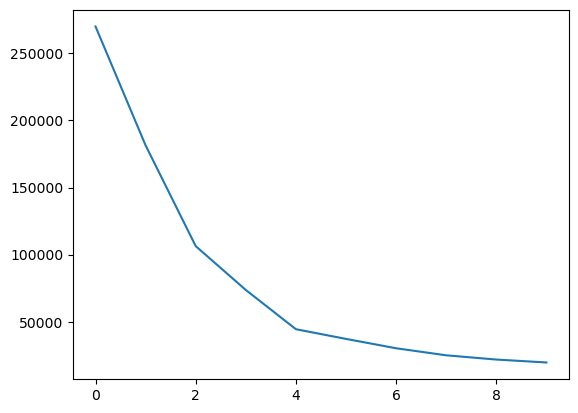

In [13]:
plt.plot(ssd)

In [19]:
range_cluster = range(1,11)

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(x)

    # ssd.append(kmeans.inertia_) 
    
    silhoutte_avg = silhouette_score(x,kmeans.labels_)
    print("For clusters: ",i," the silhouette score is: ",silhoutte_avg)

For clusters:  2  the silhouette score is:  0.2968969162503008
For clusters:  3  the silhouette score is:  0.46761358158775435
For clusters:  4  the silhouette score is:  0.4931963109249047
For clusters:  5  the silhouette score is:  0.553931997444648
For clusters:  6  the silhouette score is:  0.53976103063432
For clusters:  7  the silhouette score is:  0.5264283703685728
For clusters:  8  the silhouette score is:  0.45827056882053113
For clusters:  9  the silhouette score is:  0.4565077334305076
For clusters:  10  the silhouette score is:  0.45925273534781125


In [20]:
# Optimum  Cluster is 5

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

Y = kmeans.fit_predict(x)

Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

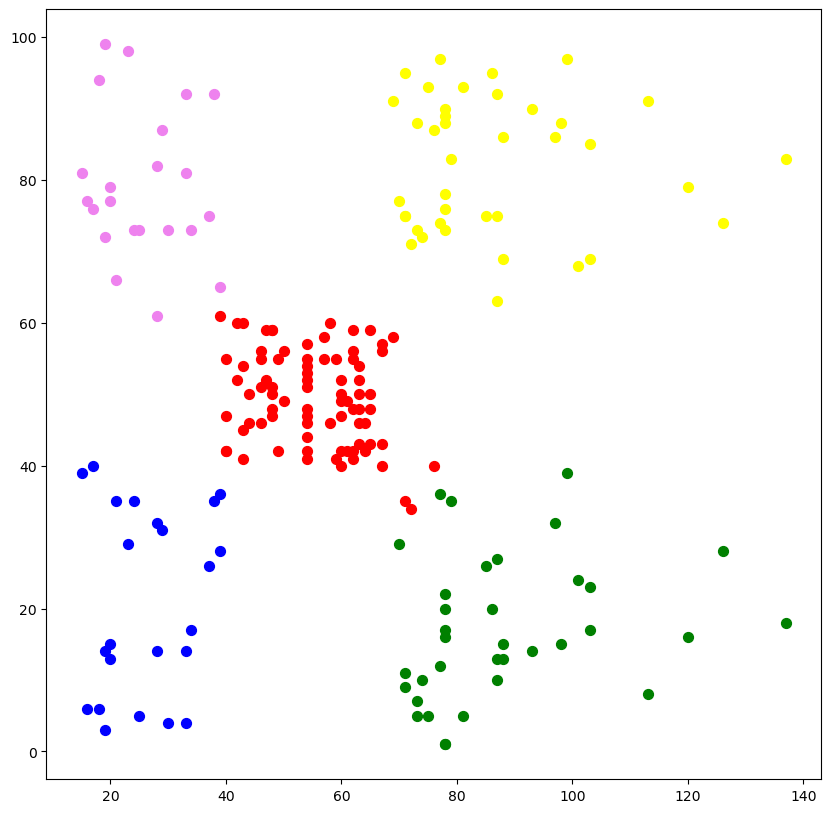

In [33]:
plt.figure(figsize = (10,10))

plt.scatter(x[Y==0,0],x[Y==0,1],s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1],s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(x[Y==2,0],x[Y==2,1],s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(x[Y==3,0],x[Y==3,1],s = 50, c = 'violet', label = 'Cluster 4')
plt.scatter(x[Y==4,0],x[Y==4,1],s = 50, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:0],kmeans.cluster_centers_[:0], s = 200, c = 'cyan', label = 'Centroids')
